### Regresión Lineal para Predicción de Notas 

#### Punto 1: Librerías

In [1]:
##Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Punto 2: Funciones de Base

In [22]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext, sepa):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, sep=sepa)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

##Función multigraficas
def multigraf (df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

##Funcion multigraficas para tres variables
def multigrafTres (df, coluno, coldos, coltres):
    h = sns.FacetGrid(df, col=coluno, height=4, aspect=.5)
    h.map(sns.barplot, coldos, coltres, order=['M','F'])
    return h

##Función de barras y de dispersion
def barras(df, colx, coly, cruce):
    sns.catplot(x=colx, y=coly, hue=cruce, kind='bar', data=df)

def dispersion (df, cruce, num, numdos):
    g = sns.FacetGrid(df, hue=cruce, palette='flare', height=5)
    g.map(sns.scatterplot, num, numdos, s=100, alpha=0.5)
    g.add_legend()
    return g


#### Punto 3: Llamado a Funciones

In [6]:
### Cargue de datos
notas = importDatos('./Datasets/', 'student-mat','.csv', ';')

notas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
datos_NAN(notas)

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school     object           2          0
                                     sex     object           2          0
                                     age      int64           8          0
                                 address     object           2          0
                                 famsize     object           2          0
                                 Pstatus     object           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

In [9]:
###Revisión de estadística para variables numéricas
notas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


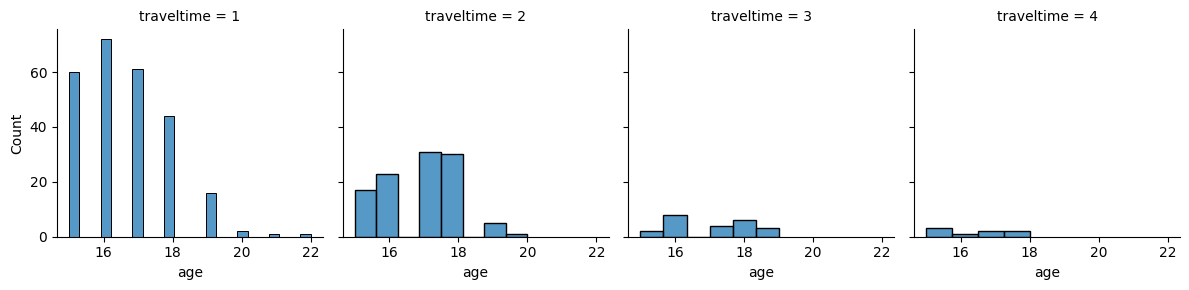

In [11]:
### Multigraficas 1
multigraf(notas, 'traveltime','age')

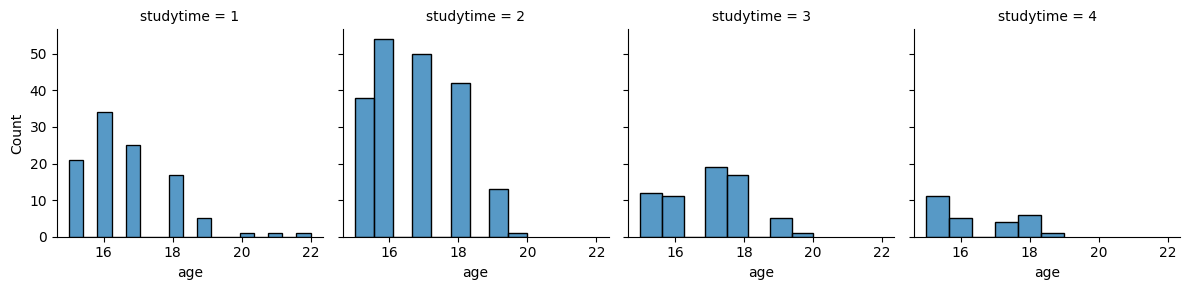

In [12]:
multigraf(notas, 'studytime','age')

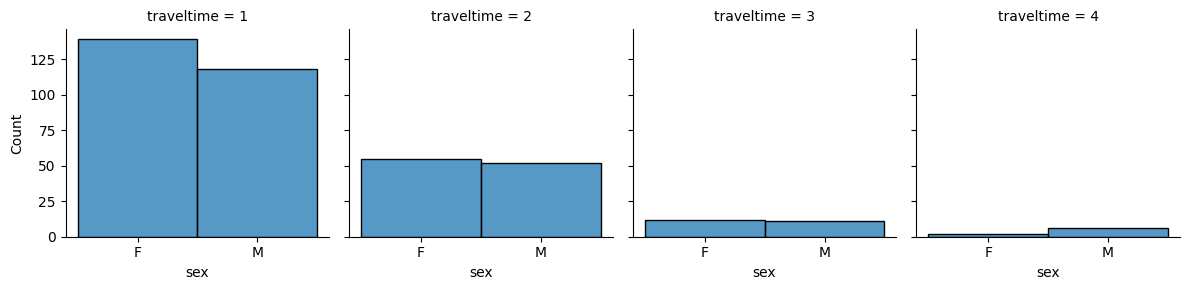

In [14]:
multigraf(notas, 'traveltime','sex')

In [15]:
notas.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

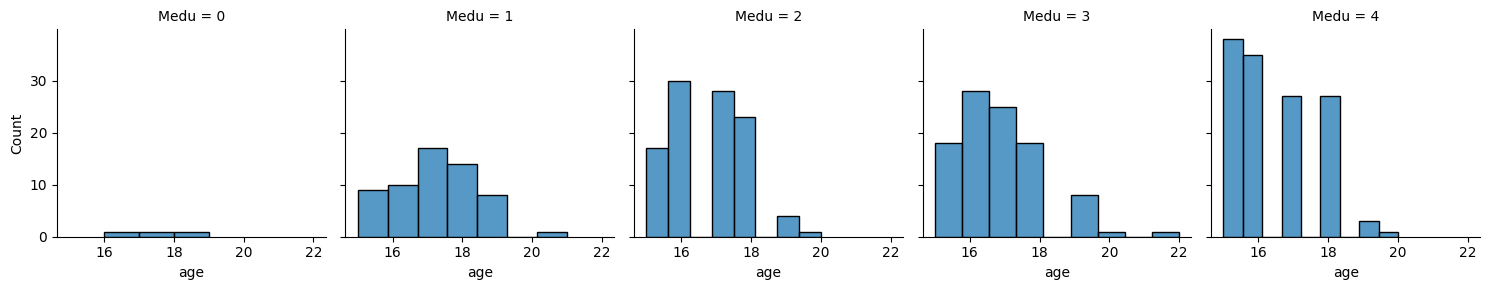

In [16]:
multigraf(notas, 'Medu','age')

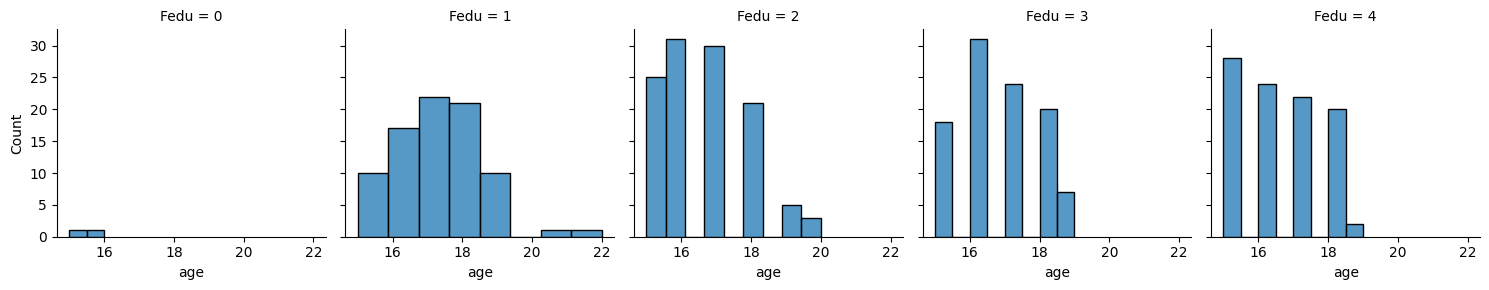

In [17]:
multigraf(notas, 'Fedu','age')

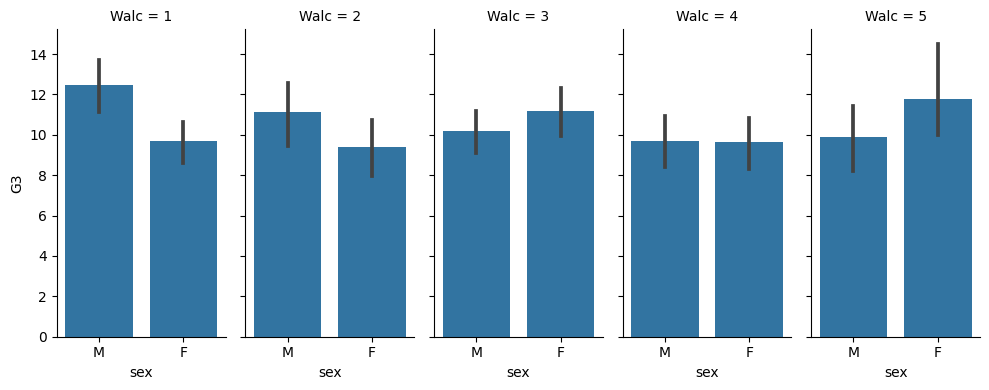

In [19]:
## Walc, sex, G3

multigrafTres(notas, 'Walc','sex','G3')

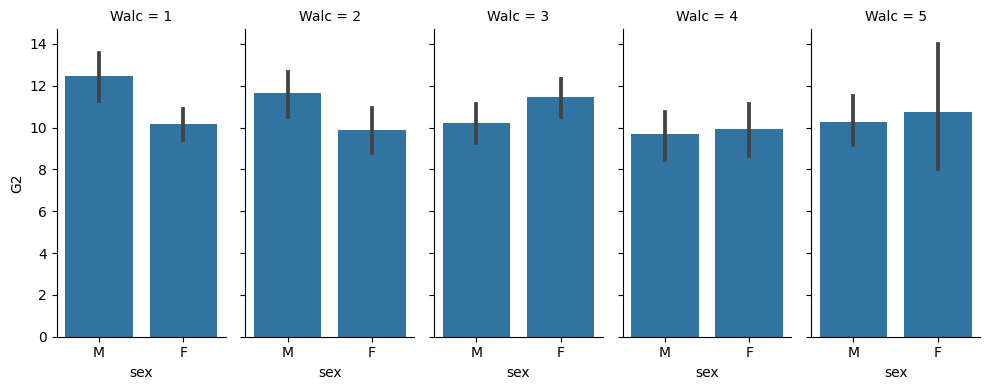

In [20]:
multigrafTres(notas, 'Walc','sex','G2')

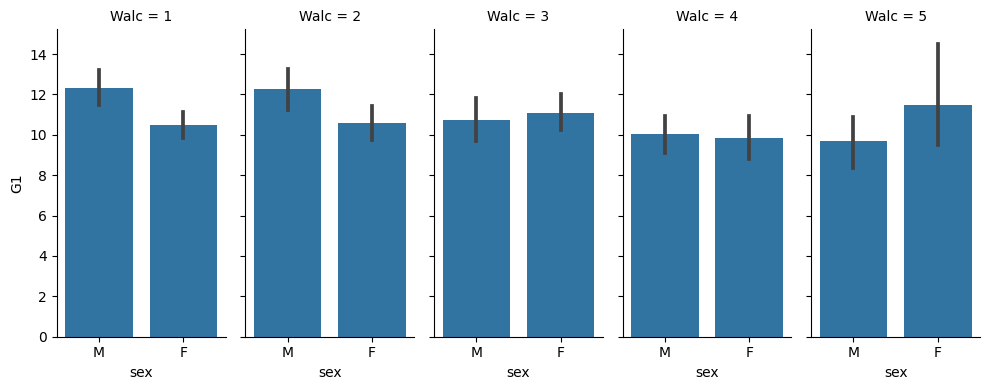

In [21]:
multigrafTres(notas, 'Walc','sex','G1')

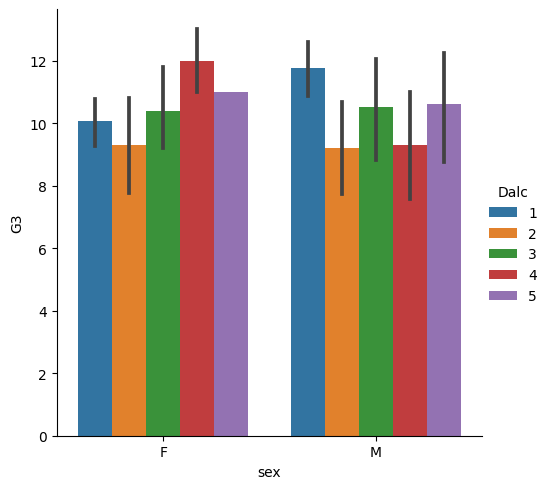

In [23]:
barras(notas, 'sex','G3','Dalc')

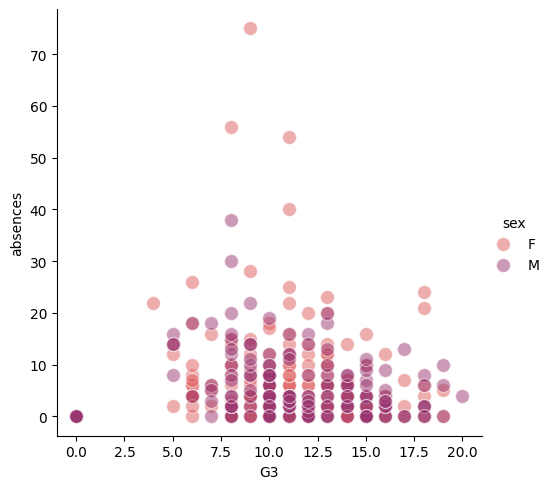

In [24]:
dispersion(notas, 'sex','G3','absences')

In [25]:
### variables numéricas
numerico = [i for i in notas.columns if notas[i].dtype!='O']

numerico

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [26]:
categoricas = [i for i in notas.columns if notas[i].dtype=='O']

categoricas

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [27]:
##Filtro sencillo para dejar necesario
datos = notas[numerico]
datos.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
